In [1]:
import pandas as pd
import numpy as np
import gzip

# Text Cleaning Libraries
import re
import nltk
from nltk.corpus import stopwords 
stops = stopwords.words("english")

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import matplotlib.pyplot as plt

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [3]:
beauty_df = getDF("reviews_Beauty_5.json.gz")
grocery_df = getDF("reviews_Grocery_and_Gourmet_Food_5.json.gz")
home_df = getDF("reviews_Home_and_Kitchen_5.json.gz")
office_df = getDF("reviews_Office_Products_5.json.gz")
pet_df = getDF("reviews_Pet_Supplies_5.json.gz")

In [4]:
beauty_df["text"] = beauty_df["reviewText"]+beauty_df["summary"]
beauty_df["category"] = 0 # Beauty has been encoded to 0
beauty_df = beauty_df.head(53200)
beauty_df = beauty_df[["text","category"]]
beauty_df = beauty_df.drop_duplicates()

grocery_df["text"] = grocery_df["reviewText"] + grocery_df["summary"]
grocery_df["category"] = 1 # Grocery has been encoded to 1
grocery_df = grocery_df.head(53200)
grocery_df = grocery_df[["text","category"]]
grocery_df = grocery_df.drop_duplicates()

home_df["text"] = home_df["reviewText"] + home_df["summary"]
home_df["category"] = 2 # Home has been encoded to 2
home_df = home_df.head(53200)
home_df = home_df[["text","category"]]
home_df = home_df.drop_duplicates()

office_df["text"] = office_df["reviewText"] + office_df["summary"]
office_df["category"] = 3 # office has been encoded to 3
office_df = office_df.head(53200)
office_df = office_df[["text","category"]]
office_df = office_df.drop_duplicates()

pet_df["text"] = pet_df["reviewText"] + pet_df["summary"]
pet_df["category"] = 4 # Pet has been encoded to 4
pet_df = pet_df.head(53200)
pet_df = pet_df[["text","category"]]
pet_df = pet_df.drop_duplicates()

In [5]:
df = pd.concat([beauty_df,grocery_df,home_df,office_df,pet_df])

In [6]:
df.shape

(265993, 2)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(265993, 2)

In [9]:
df

,text,category
0,Very oily and creamy. Not at all what I expect...,0
1,This palette was a decent price and I was look...,0
2,The texture of this concealer pallet is fantas...,0
3,I really can't tell what exactly this thing is...,0
4,"It was a little smaller than I expected, but t...",0
...,...,...
53195,I can scoop the wet and dirty litter into the ...,4
53196,LITTER LOCKER is a great product. I have two c...,4
53197,Great product to have in a house with multi ca...,4
53198,We purchased the Litter Locker and LOVE it! Ma...,4


In [10]:
def data_cleaning(text):
    text = text.lower() # convert everything into lower case
    text = re.sub("[^a-z]"," ",text) # ("allow","replace","data")
    text = re.sub("http\S+"," ",text,flags=re.MULTILINE) # replaces hyperlinks with space and flags is to recursively check hyperlinks
    words = text.split()  # Split the entire sentence into words
    imp_words = [w for w in words if w not in stops] # Picking up only imp words after filtering out the stop words
    
    return(" ".join(imp_words))

In [11]:
df["cleaned_text"] = df["text"].apply(lambda x : data_cleaning(x) ) 

In [12]:
df.head()

,text,category,cleaned_text
0,Very oily and creamy. Not at all what I expect...,0,oily creamy expected ordered try highlight con...
1,This palette was a decent price and I was look...,0,palette decent price looking different shades ...
2,The texture of this concealer pallet is fantas...,0,texture concealer pallet fantastic great cover...
3,I really can't tell what exactly this thing is...,0,really tell exactly thing powder kind oil ish ...
4,"It was a little smaller than I expected, but t...",0,little smaller expected okay lasted long time ...


In [13]:
df = df[["cleaned_text", "category"]]

In [14]:
max(df["cleaned_text"].apply(lambda x : len(x.split())))

3097

In [15]:
min(df["cleaned_text"].apply(lambda x : len(x.split())))

0

In [16]:
np.mean(df["cleaned_text"].apply(lambda x : len(x.split())))

52.615971096983756

In [17]:
X = df["cleaned_text"]
y = df["category"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Data Preprocessing

In [19]:
tok = Tokenizer(oov_token="<UNK>")

In [20]:
tok.fit_on_texts(X_train)

In [21]:
len(tok.word_index)

112548

In [22]:
vocab_size = len(tok.word_index) + 1

In [23]:
max_length = 120
truncating_type = "post"
padding_type = "post"

In [24]:
train_sequences = tok.texts_to_sequences(X_train)
test_sequences = tok.texts_to_sequences(X_test)

In [25]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=truncating_type, padding=padding_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=truncating_type, padding=padding_type)

In [26]:
train_padded[0]

array([   42,     2,   477, 16269,   424,  3023,  3125,   977,   324,
           2,   267,   305,  1439,  3060,    95,  2735,   410,  1233,
         104, 16269,   424,  2164,    10,  3656,   215,    48, 16269,
         424,   204,     2,    21,    94,   420,     9,   410,  6513,
         952,   542,   336,     4, 16269,   424,    26,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0])

In [27]:
LSTM_model = Sequential([
    Embedding(vocab_size, 300), 
    LSTM(128),
    Dense(20, activation="relu"),
    Dense(5, activation="softmax")
])

In [28]:
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         33764700  
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense (Dense)               (None, 20)                2580      
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
Total params: 33,987,033
Trainable params: 33,987,033
Non-trainable params: 0
_________________________________________________________________


In [29]:
LSTM_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [30]:
history = LSTM_model.fit(train_padded, y_train, batch_size=500, epochs=3, validation_data=(test_padded,y_test))

Epoch 1/3
426/426 [==============================] - 749s 2s/step - loss: 1.4146 - accuracy: 0.3327 - val_loss: 1.5651 - val_accuracy: 0.2678
Epoch 2/3
426/426 [==============================] - 705s 2s/step - loss: 0.9419 - accuracy: 0.6236 - val_loss: 0.5162 - val_accuracy: 0.8468
Epoch 3/3
426/426 [==============================] - 706s 2s/step - loss: 0.4335 - accuracy: 0.8794 - val_loss: 0.3980 - val_accuracy: 0.8958


In [31]:
history.history["accuracy"]

[0.3326597511768341, 0.6235702037811279, 0.879395067691803]

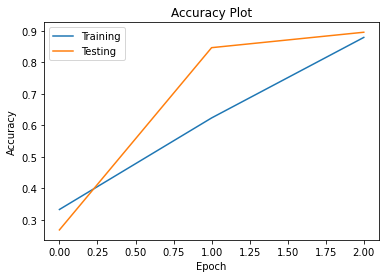

In [32]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Plot")
plt.legend(["Training", "Testing"])

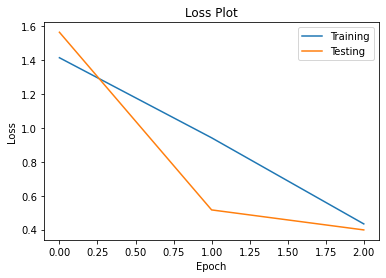

In [33]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.legend(["Training", "Testing"])

# Saving the model and tokens

In [34]:
LSTM_model.save("LSTM_model.h5")

In [35]:
import pickle

# for writing the pickle file
with open('tok.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# for reading the pickle file
#with open('filename.pickle', 'rb') as handle:
#   b = pickle.load(handle)


In [36]:
# As a NLP Engineer, once the model building is completed we are supposed to give 4 files to DevOps/deployment team:
# 1. Requirement.txt file : This file contains all the important libraries needed for model execution
# 2. model.h5 file : This file basically contains the entire model
# 3. Tokenizer.pickle : This file basically contains word tokens
# 4. Execution.py : This file is basically code of the model